**author**: lukethompson@gmail.com<br>
**date**: 14 Nov 2016<br>
**language**: Python 3.5<br>
**conda environment**: emp-py3<br>
**license**: unlicensed<br>

## nestedness_binary_heatmaps.ipynb

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empcolors

In [2]:
# seaborn plot settings
sns.set_context('talk')
sns.set_style('white')

In [3]:
# input file paths
paths_phylum_empo2 = [
    '/Users/luke/emp/analyses-nestedness/nest_phylum_Animal',
    '/Users/luke/emp/analyses-nestedness/nest_phylum_Plant',
    '/Users/luke/emp/analyses-nestedness/nest_phylum_Saline',
    '/Users/luke/emp/analyses-nestedness/nest_phylum_Non-saline']
    
paths_phylum_all = ['/Users/luke/emp/analyses-nestedness/nest_phylum_allsamples']    

In [4]:
def plot_nestedness(path, taxlevel, xmax, ymax, legendloc, legendcol):
    df = pd.read_csv('%s.csv' % path)
    # df = df[df['OBSERVATION_ID'] != 'unclassified'] # if we want to remove unclassified phylum
    empolevel = path.split('/')[-1].split('_')[-1]
    if xmax == 'auto':
        xmax = df.SAMPLE_RANK.max()
    if ymax == 'auto':
        ymax = df.OBSERVATION_RANK.max()
    fig = plt.figure(figsize=(xmax/30, 80/12.7), facecolor=None) # ymax/12.7
    for empo3 in np.sort(df.empo_3.unique()):
        plt.scatter(df[df.empo_3 == empo3].SAMPLE_RANK, df[df.empo_3 == empo3].OBSERVATION_RANK, marker='|', linewidths=2, label=empo3, color=empcolors.empo3_cat_color(empo3))
    plt.xlabel('%s samples (sorted by richness)' % empolevel)
    plt.ylabel('%s (sorted by prevalence)' % taxlevel)
    plt.axis([0, xmax+1, 0, ymax+0.8])
    plt.legend(loc=legendloc, ncol=legendcol, markerscale=4, handletextpad=0) # bbox_to_anchor=(0.5, 1+0.08*80/ymax), 
    #plt.tight_layout()
    fig.patch.set_alpha(0.0)
    plt.savefig('%s.pdf' % path)
    return df, empolevel

In [5]:
def top_taxa(df):
    return df[['OBSERVATION_RANK', 'OBSERVATION_ID']].sort_values(
        'OBSERVATION_RANK', ascending=False).drop_duplicates().reset_index(drop=True)

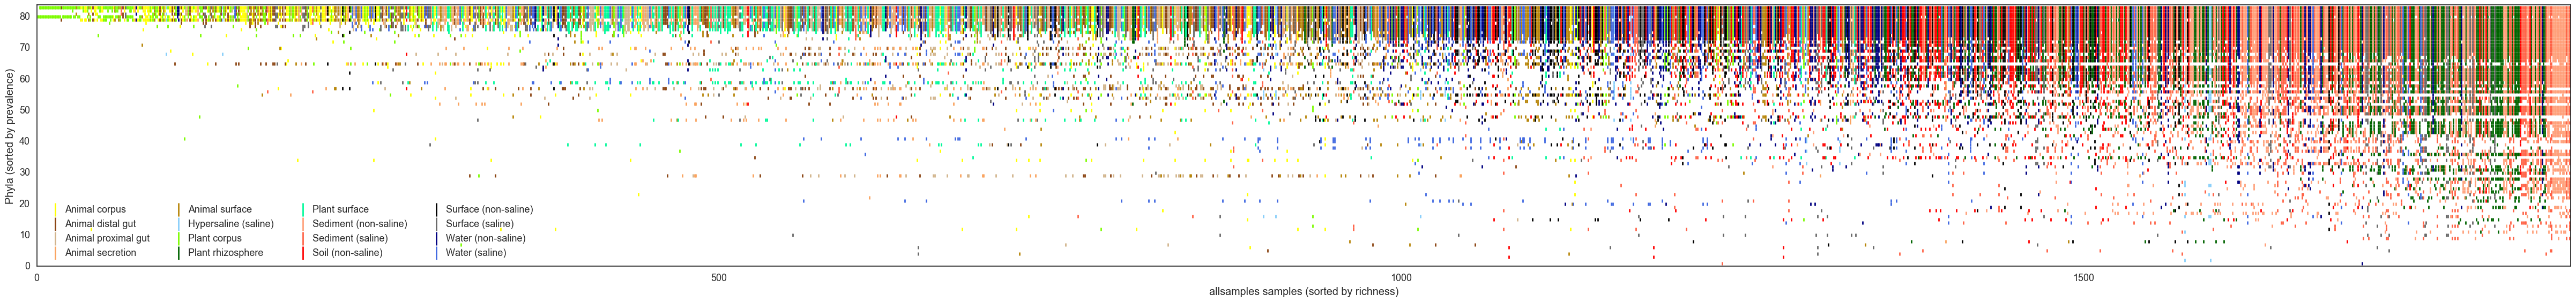

In [6]:
panels_dict = {}
for path in paths_phylum_all:
    df, empolevel = plot_nestedness(path, 'Phyla', 'auto', 'auto', 3, 4)
    panels_dict[empolevel] = df

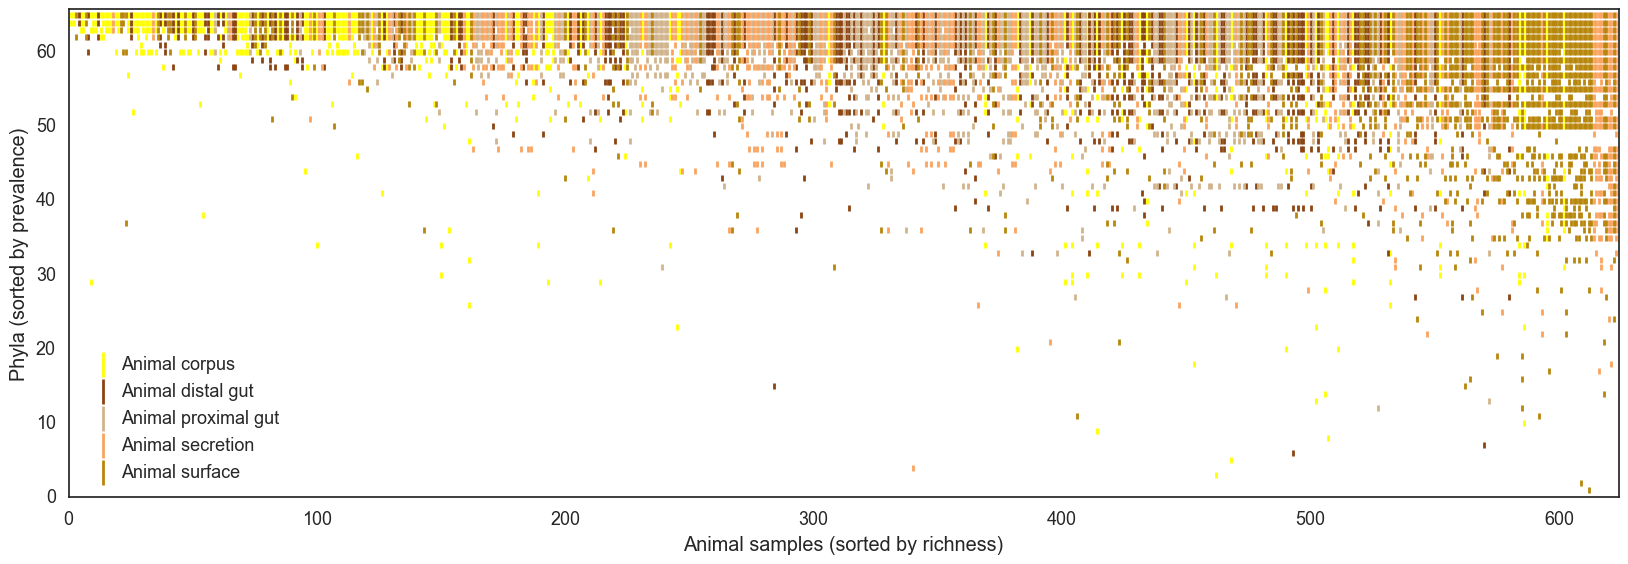

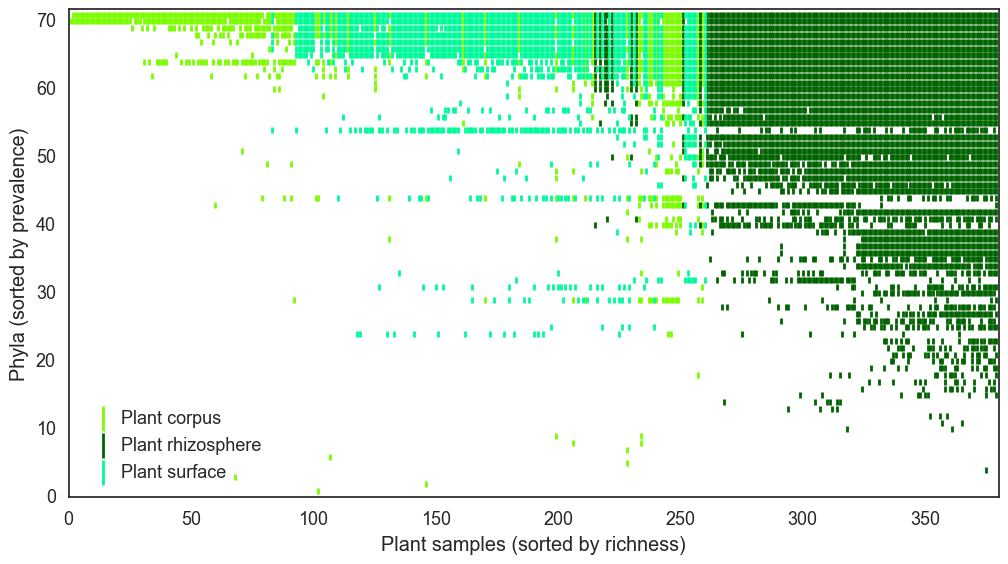

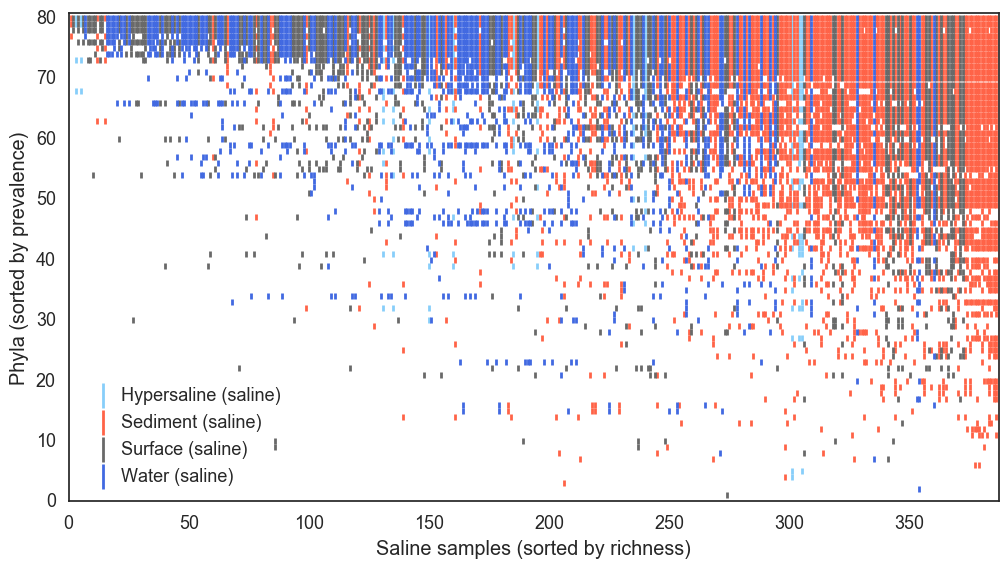

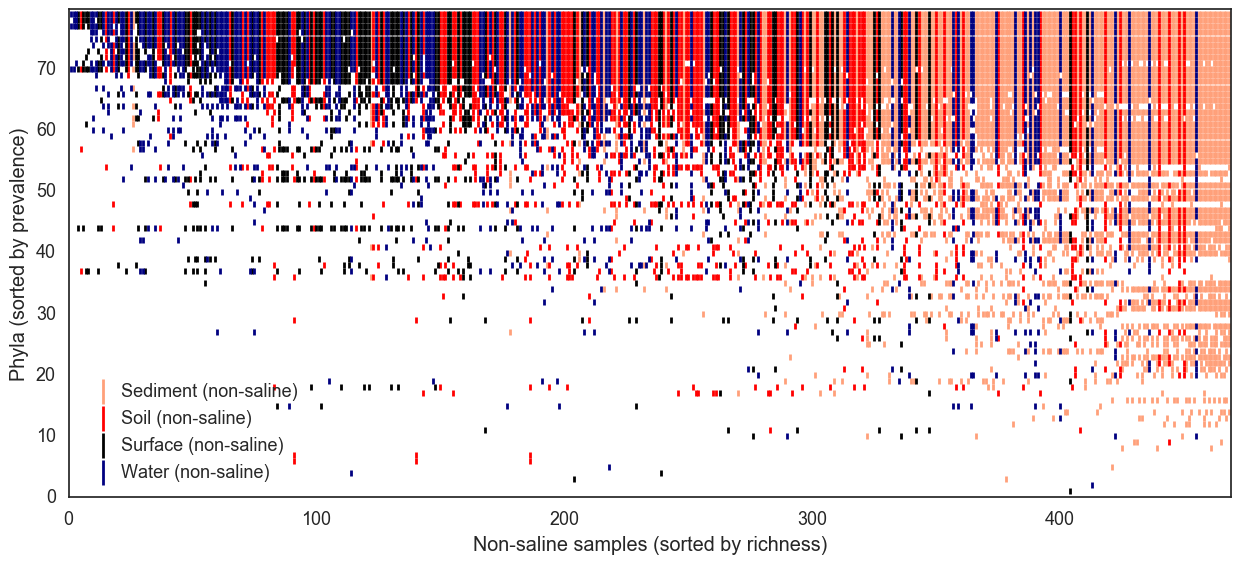

In [7]:
for path in paths_phylum_empo2:
    df, empolevel = plot_nestedness(path, 'Phyla', 'auto', 'auto', 3, 1)
    panels_dict[empolevel] = df

In [8]:
for key in sorted(panels_dict):
    print('\n' + key)
    print(panels_dict[key]['OBSERVATION_ID'].value_counts().head(8))


Animal
k__Bacteria;p__Proteobacteria     623
k__Bacteria;p__Firmicutes         614
k__Bacteria;p__Actinobacteria     587
k__Bacteria;p__Bacteroidetes      571
unclassified                      443
k__Bacteria;p__Cyanobacteria      442
k__Bacteria;p__Verrucomicrobia    354
k__Bacteria;p__Fusobacteria       309
Name: OBSERVATION_ID, dtype: int64

Non-saline
k__Bacteria;p__Proteobacteria     468
k__Bacteria;p__Actinobacteria     466
k__Bacteria;p__Bacteroidetes      464
k__Bacteria;p__Verrucomicrobia    451
unclassified                      450
k__Bacteria;p__Planctomycetes     448
k__Bacteria;p__Acidobacteria      444
k__Bacteria;p__Chloroflexi        440
Name: OBSERVATION_ID, dtype: int64

Plant
k__Bacteria;p__Proteobacteria     377
k__Bacteria;p__Cyanobacteria      367
k__Bacteria;p__Actinobacteria     320
k__Bacteria;p__Bacteroidetes      311
k__Bacteria;p__Verrucomicrobia    288
k__Bacteria;p__Planctomycetes     280
unclassified                      270
k__Bacteria;p__Firmicutes    